Note: This is an in-progress analysis based on the "Auto Insurance Claims Data" dataset by BuntyShah, available on Kaggle: https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data.

In [1]:
### Import necessities ###
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv("insurance_claims.csv")

### Cleaning ###
# Drop duplicate rows
df = df.drop_duplicates()

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

# Handle missing values
missing_summary = df.isnull().sum()
print("Missing values per column:\n", missing_summary)

# Drop columns with missing >20%
# threshold = len(df) * 0.25
# df = df.dropna(axis=1, thresh=threshold)

# Impute numeric columns with median
# numeric_cols = df.select_dtypes(include='number').columns
# df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Impute categorical columns with mode
# categorical_cols = df.select_dtypes(include='object').columns
# for col in categorical_cols:
    # df[col] = df[col].fillna(df[col].mode()[0])

# Impute missing values conservatively to preserve as many variables as possible
# Keep columns unless they are empty
for col in df.columns:
    if df[col].isnull().sum() == len(df):
        df.drop(columns=col, inplace=True) # Drop if completely missing

    elif df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown") # Utilize "Unknown" placeholder for categorical variables

    else:
        df[col] = df[col].fillna(df[col].median()) # Use median for numeric variables

# Encode categorical variables in preparation for modeling
df_encoded = pd.get_dummies(df, drop_first=True)

# Remove outliers in preparation for regression
# Cap total_claim_amount at the 99th percentile
# cap = df['total_claim_amount'].quantile(0.99)
# df['total_claim_amount'] = np.where(df['total_claim_amount'] > cap, cap, df['total_claim_amount'])

# Convert date columns
# df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

# Check cleaning
print("Cleaned shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())

Missing values per column:
 months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital_gains                     0
capital_loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0


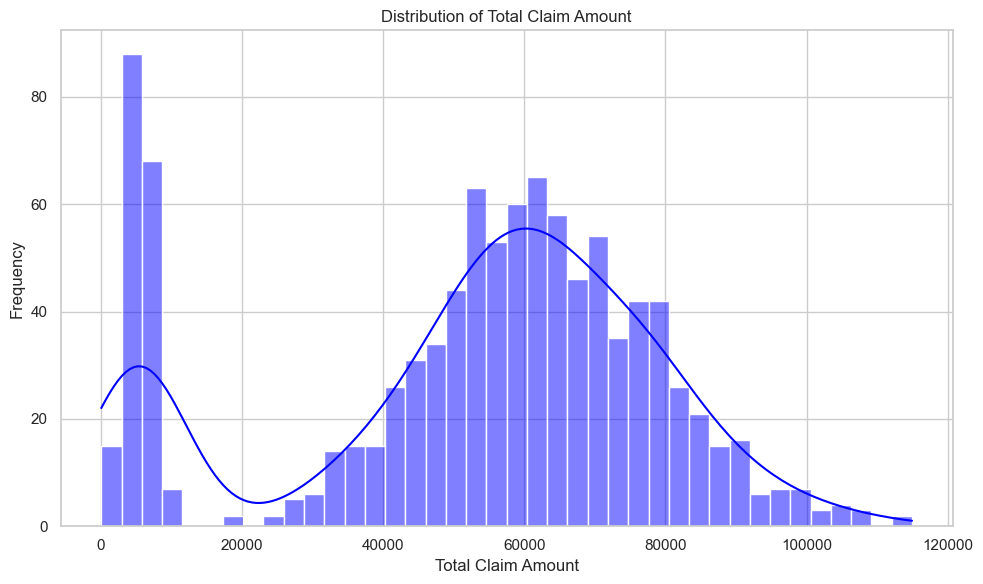

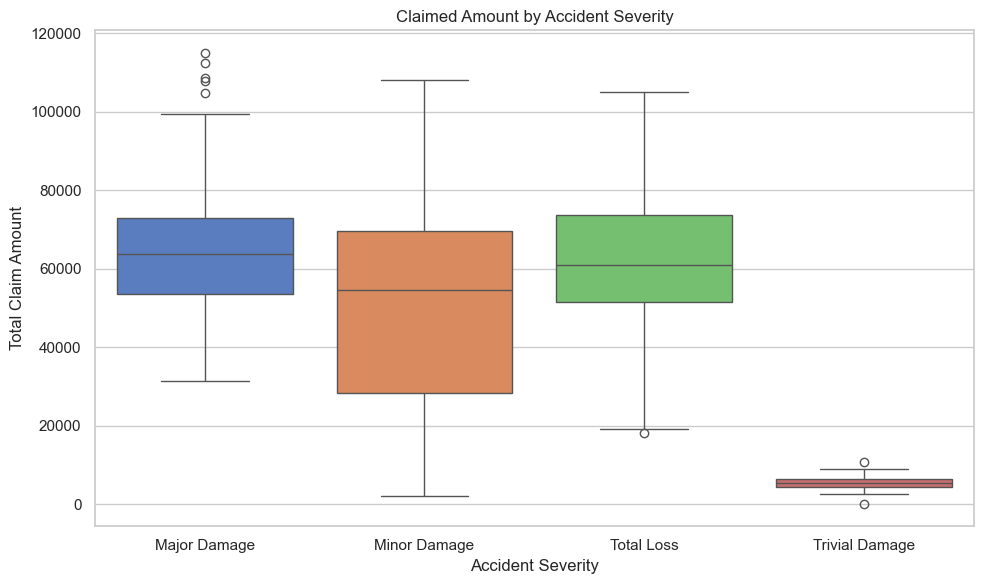

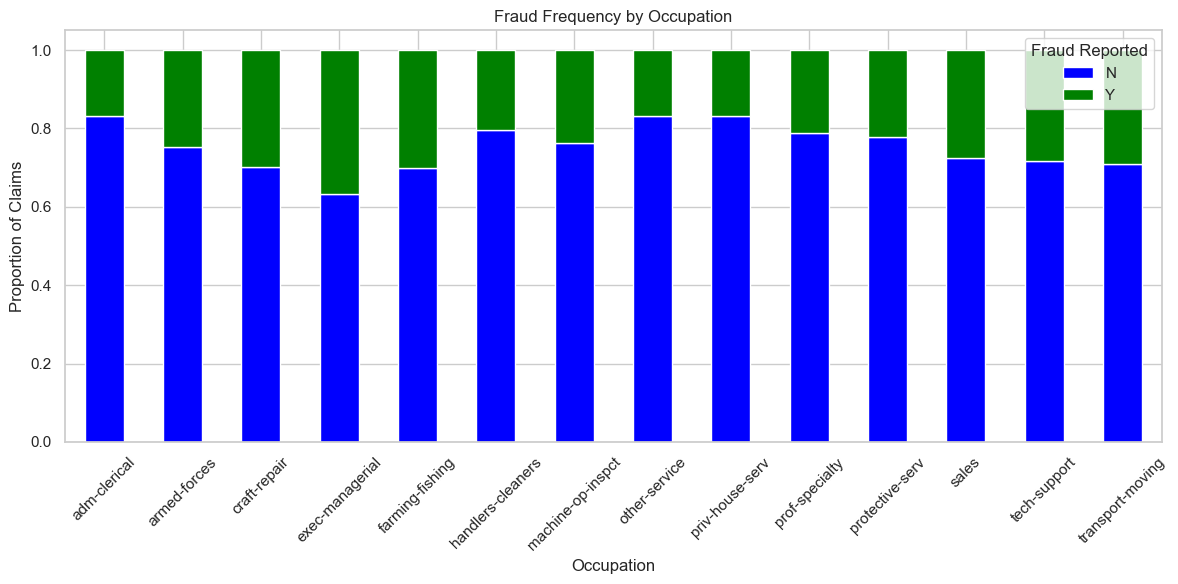

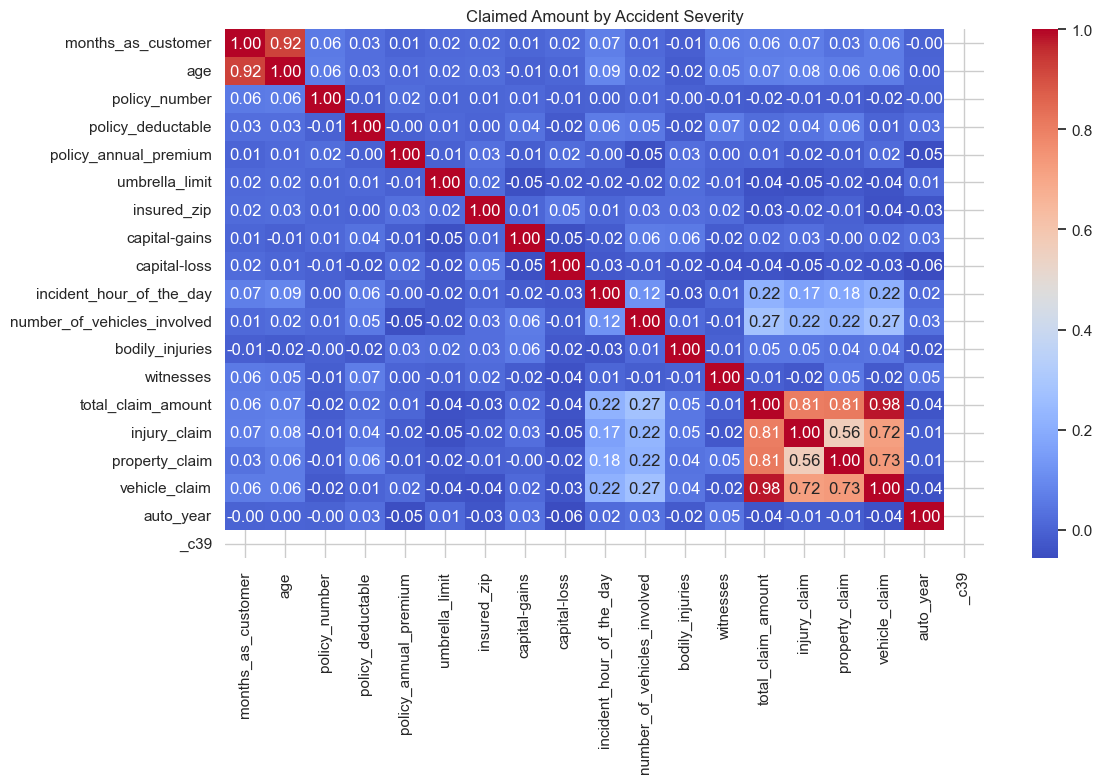

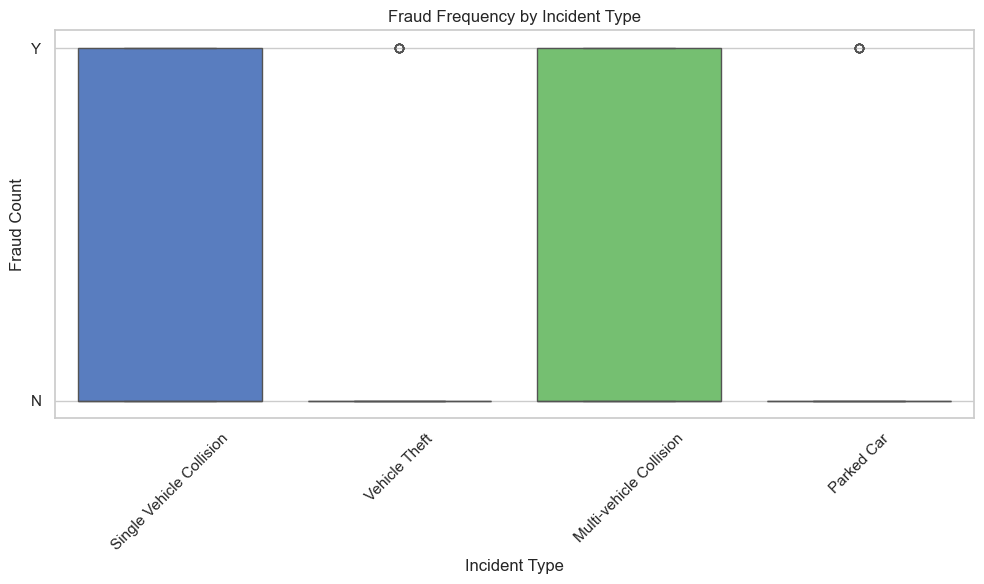

In [25]:
### Visualizations ###

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset 
df = pd.read_csv("insurance_claims.csv")

# Set plot styling 
sns.set(style="whitegrid") # workout styling later....

# Distribution of total claim amount
plt.figure(figsize=(10, 6))
sns.histplot(df['total_claim_amount'], bins=40, kde=True, color='blue')
plt.title("Distribution of Total Claim Amount")
plt.xlabel("Total Claim Amount")
plt.ylabel("Frequency")
plt. tight_layout()
plt.savefig("Distribution of Total Claim Amount.png", dpi=300, bbox_inches='tight')
plt.show()

# Boxplot of Claim Amount by Incident Severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_severity', y='total_claim_amount', data=df, hue='incident_severity', palette='muted', dodge=False)
plt.title("Claimed Amount by Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Total Claim Amount")
plt. tight_layout()
plt.savefig("Claimed Amount by Accident Severity.png", dpi=300, bbox_inches='tight')
plt.show()

# Frequency of Fraud by Occupation
# Calculate fraud rate by occupation
fraud_rate = (
    df.groupby(['insured_occupation', 'fraud_reported'])
    .size()
    .unstack(fill_value=0)
)
                
# Normalize to get proportions
fraud_rate_norm = fraud_rate.div(fraud_rate.sum(axis=1), axis=0)
                       
# Plot normalized fraud rates           
fraud_rate_norm.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue','green'])
#sns.boxplot(x='insured_occupation', y='fraud_reported', data=df, hue='insured_occupation', palette='muted', dodge=False)
plt.title("Fraud Frequency by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Proportion of Claims")
plt.xticks(rotation=45)
plt.legend(title="Fraud Reported", loc='upper right')
plt.tight_layout()
plt.show()

# Correlation Heatmap of Numeric Features
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Claimed Amount by Accident Severity")
plt. tight_layout()
plt.show()

# Bar plot of Fraud by Incident Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_type', y='fraud_reported', data=df, hue='incident_type', palette='muted', dodge=False)
plt.title("Fraud Frequency by Incident Type")
plt.xlabel("Incident Type")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt. tight_layout()
plt.show()